## PyTorch & Tensor
torch.Tensor 储存和变换数据的主要工具， 类似numpy，提供GPU计算和自动求梯度等更多功能

In [1]:
import torch
import numpy as np

### 创建变量

In [2]:
x = torch.empty(5,3)
print(x)
x = torch.rand(5,3)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.1704e-41],
        [ 0.0000e+00,  2.2369e+08,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [        nan,         nan, -2.1156e+37]])
tensor([[0.2365, 0.6945, 0.0757],
        [0.8336, 0.7359, 0.3479],
        [0.4410, 0.7822, 0.4089],
        [0.9240, 0.9262, 0.7024],
        [0.8965, 0.1811, 0.2153]])


In [3]:
x = torch.zeros(5,3)
print(x)
x = torch.zeros(5,3, dtype=torch.long)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [4]:
x = torch.tensor([5.5, 3]) #直接创建
print(x)
x = x.new_ones(5,3, dtype=torch.float64)
print(x)
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.1049, -0.0528,  1.4126],
        [ 0.7090,  1.1800, -0.3778],
        [ 1.9990, -1.3506,  1.5703],
        [ 0.5392,  0.1876,  2.5351],
        [ 1.5599, -0.6710, -1.1547]])


### shape & size( )

In [5]:
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


### 操作

#### 算数操作

In [6]:
y = torch.rand(5,3)

# 加法
print(x+y)

print(torch.add(x,y))

result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

y.add_(x)
print(y)

tensor([[ 0.6035,  0.9219,  1.7084],
        [ 1.3126,  1.5362,  0.0230],
        [ 2.0005, -1.2339,  2.5325],
        [ 1.1551,  0.2200,  3.3443],
        [ 1.7432,  0.0677, -0.4968]])
tensor([[ 0.6035,  0.9219,  1.7084],
        [ 1.3126,  1.5362,  0.0230],
        [ 2.0005, -1.2339,  2.5325],
        [ 1.1551,  0.2200,  3.3443],
        [ 1.7432,  0.0677, -0.4968]])
tensor([[ 0.6035,  0.9219,  1.7084],
        [ 1.3126,  1.5362,  0.0230],
        [ 2.0005, -1.2339,  2.5325],
        [ 1.1551,  0.2200,  3.3443],
        [ 1.7432,  0.0677, -0.4968]])
tensor([[ 0.6035,  0.9219,  1.7084],
        [ 1.3126,  1.5362,  0.0230],
        [ 2.0005, -1.2339,  2.5325],
        [ 1.1551,  0.2200,  3.3443],
        [ 1.7432,  0.0677, -0.4968]])


#### 索引
索引出来的结果与原数据共享内存，也即修改⼀一个，另⼀一个会跟着修改。

In [7]:
y = x[0, :]
y += 1
print(y)

print(x[0, :]) 

tensor([1.1049, 0.9472, 2.4126])
tensor([1.1049, 0.9472, 2.4126])


#### 改变形状 view( )

In [8]:
y = x.view(15) # 5*3
z = x.view(-1,5) # -1: 根据其他维度的值推算
print(x.size(), y.size(), z.size())

torch.Size([5, 3]) torch.Size([15]) torch.Size([3, 5])


In [9]:
x_cp = x.clone().view(15)
x -= 1
print(x)
print(x_cp)

tensor([[ 0.1049, -0.0528,  1.4126],
        [-0.2910,  0.1800, -1.3778],
        [ 0.9990, -2.3506,  0.5703],
        [-0.4608, -0.8124,  1.5351],
        [ 0.5599, -1.6710, -2.1547]])
tensor([ 1.1049,  0.9472,  2.4126,  0.7090,  1.1800, -0.3778,  1.9990, -1.3506,
         1.5703,  0.5392,  0.1876,  2.5351,  1.5599, -0.6710, -1.1547])


In [10]:
x = torch.randn(1)
print(x)
print(x.item()) #将标量转换成python number数值

tensor([-0.1838])
-0.1837577372789383


### 广播机制

In [11]:
x = torch.arange(1,3).view(1,2)
print(x)
y = torch.arange(1,4).view(3,1)
print(y)
print(x+y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 与numpy互换

In [12]:
# Tensor => Numpy
a = torch.ones(5)
b = a.numpy()
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]


In [13]:
# Numpy => Tensor
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

c = torch.tensor(a)
print(a, c)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


### On GPU

In [14]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

### 自动求梯度
对函数求梯度：gradient
Tensor是这个包的核⼼心类，如果将其属性 .requires_grad 设置为True ，它将开始追踪(track)在其上的所有操作(这样就可以利利⽤用链式法则进⾏行行梯度传播了了)。完成计算后，可以调⽤用 .backward() 来完成所有梯度计算。此Tensor的梯度将累积到 .grad 属性中。

In [15]:
x = torch.ones(2, 2, requires_grad=True)
print(x, "\n", x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True) 
 None


In [16]:
y = x+2
print(y, "\n", y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>) 


In [17]:
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a=((a*3)/(a-1))
print(a.requires_grad) # False

a.requires_grad_(True)
print(a.requires_grad) # True

b=(a*a).sum()
print(b.grad_fn)

False
True


#### 梯度

In [18]:
y = x+2
z = y*y*3
out = z.mean()
out.backward()
print(z,"\n",out)
print(z.grad_fn)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) 
 tensor(27., grad_fn=<MeanBackward0>)


In [19]:
print(x.grad) #Jacobian matrix

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [20]:
out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])
tensor([[1., 1.],
        [1., 1.]])


In [21]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
print(z)

v = torch.tensor([[1.0, 0.1],[0.01, 0.001]], dtype=torch.float)
z.backward(v) # 1=torch.sum(y*w) 再求1对x的导数
print(x.grad)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward>)
tensor([2.0000, 0.2000, 0.0200, 0.0020])


#### 中断梯度

In [22]:
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

print(x.requires_grad)
print(y1, y1.requires_grad)
print(y2, y2.requires_grad)
print(y3, y3.requires_grad)

y3.backward()
print("++++++",x.grad,"++++++")

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True
++++++ tensor(2.) ++++++


In [23]:
x = torch.ones(1, requires_grad=True)
print(x.data)
print(x.data.requires_grad)

y = 2 * x
x.data *= 100

y.backward()

print(x)
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


## 线性回归
$ y = X w + b + \varepsilon $

### 基本要素
数据集、损失函数、优化函数-随机梯度下降

### 矢量计算

In [24]:
import torch
import time

n = 1000
a = torch.ones(n)
b = torch.ones(n)

In [25]:
class Timer(object):
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        self.start_time = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.start_time)
        return self.times[-1]
    
    def avg(self):
        return sum(self.times)/len(self.times)
    
    def sum(self):
        return sum(self.times)

In [26]:
timer = Timer()
c = torch.zeros(n)
for i in range(n):
    c[i] = a[i] +b[i]
'%.5f sec' % timer.stop()

'0.03395 sec'

In [27]:
timer.start()
d = a+b
'%.5f sec' % timer.stop()

'0.00029 sec'

### 线性回归从零开始的实现

In [28]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
print(torch.__version__)

1.4.0


#### 生成数据集

In [29]:
num_inputs = 2
num_exemples = 1000
true_w = [2,-3.4] #权重参数 true weight
true_b = 4.2 #偏置参数 true bias

features = torch.randn(num_exemples, num_inputs,
                      dtype=torch.float32)
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),
                      dtype=torch.float32)

#### 使用图像来展示生成的数据

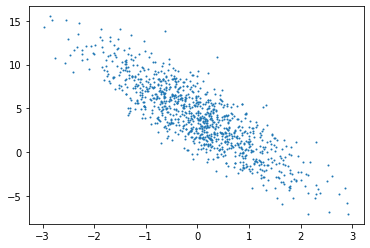

In [30]:
plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

#### 读取数据集

In [31]:
def data_iter(batch_size, features, labels):
    num_exemples = len(features)
    indices = list(range(num_exemples))
    random.shuffle(indices)
    for i in range(0, num_exemples, batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size, num_exemples)])
        yield features.index_select(0,j), labels.index_select(0,j)

In [32]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0783,  0.0489],
        [ 0.3856,  0.2268],
        [ 0.7994, -0.2109],
        [ 0.4724, -0.0590],
        [ 0.8200, -2.8481],
        [-0.2907,  0.7619],
        [-0.5802,  0.5292],
        [ 0.9449,  2.6021],
        [-0.0979,  2.2976],
        [-1.4951,  0.0291]]) 
 tensor([ 3.8737,  4.2132,  6.5280,  5.3564, 15.5271,  1.0256,  1.2443, -2.7745,
        -3.8098,  1.1170])


#### 初始化模型参数

In [33]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

#### 定义模型

In [34]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

#### 定义损失

In [35]:
def squared_loss(y_hat, y):
    return (y_hat-y.view(y_hat.size()))** 2 / 2

#### 定义优化函数

In [36]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

#### 训练

In [37]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y).sum()
        l.backward()
        sgd([w,b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features,w,b), labels)
    print('epoch %d, loss %f' % (epoch+1, train_l.mean().item()))

epoch 1, loss 0.048416
epoch 2, loss 0.000194
epoch 3, loss 0.000047
epoch 4, loss 0.000046
epoch 5, loss 0.000046


In [38]:
w, true_w, true_b

(tensor([[ 1.9994],
         [-3.3997]], requires_grad=True), [2, -3.4], 4.2)

### 使用pytorch的简洁实现

In [39]:
import torch
from torch import nn
import numpy as np
torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')

1.4.0


#### 生成数据集

In [41]:
um_inputs = 2
num_examples = 1000

true_w = [2,-3.4]
true_b = 4.2

features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

#### 读取数据集

In [42]:
import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features, labels)

data_iter = Data.DataLoader(
    dataset = dataset,
    batch_size = batch_size,
    shuffle = True, #数据重组
    num_workers = 2,
)

In [43]:
for X, y in data_iter:
    print(X, '\n', y)
    break

tensor([[ 0.7841,  0.6982],
        [ 0.2878, -0.6189],
        [-1.0351, -0.7897],
        [ 0.9505,  0.0967],
        [ 1.3045,  1.5208],
        [-1.6328, -1.6255],
        [ 0.4609, -1.3573],
        [-0.6831, -0.4384],
        [-0.3019,  0.5736],
        [-1.3333, -0.4273]]) 
 tensor([3.3882, 6.8642, 4.8177, 5.7510, 1.6476, 6.4655, 9.7363, 4.3198, 1.6403,
        2.9666])


#### 定义模型

In [44]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        # torch.nn.Linear(in_features, out_features, bias=True)

    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [45]:
# M1
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    )

# M2
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))

# M3
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


#### 初始化模型函数

In [46]:
from torch.nn import init

init.normal_(net[0].weight, mean=0.0, std=0.01)
init.constant_(net[0].bias, val=0.0)

Parameter containing:
tensor([0.], requires_grad=True)

In [47]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0142, -0.0161]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


#### 定义损失和优化函数

In [48]:
loss = nn.MSELoss() 

In [49]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)

#### 训练

In [50]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000270
epoch 2, loss: 0.000108
epoch 3, loss: 0.000091


In [51]:
dense = net[0]

print(true_w, dense.weight.data)
print(true_b, dense.bias.data)

[2, -3.4] tensor([[ 2.0002, -3.4002]])
4.2 tensor([4.1997])


### 课后作业

In [52]:
y = torch.tensor([3.14, 0.98, 1.32])
y_hat = torch.tensor([2.33, 1.07, 1.23])

print((sum((y_hat-y)**2/2))/3)

tensor(0.1121)


In [53]:
y.shape
y.view(3,1)

tensor([[3.1400],
        [0.9800],
        [1.3200]])

## Softmax与分类模型
输出值为离散类型。e.g. 图像分类问题
训练好softmax回归模型后，给定任一样本特征，就可以预测每个输出类别的概率。通常，把预测概率最大的类别作为输出类别。

### 图像分类数据集(Fashion-MNIST)

#### 获取数据集

In [54]:
import d2lzh as d2l
from IPython import display
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import time

import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input")
#sys.path

In [55]:
# 查看当前kernerl下的package
# !pip list --format=columns

# 查看当前挂载的数据集目录
!ls /Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input/

FashionMNIST2065 timemachine7163


In [56]:
mnist_train = torchvision.datasets.FashionMNIST(root='/Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input/FashionMNIST2065',
                                                train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='/Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input/FashionMNIST2065',
                                               train=False, download=True, transform=transforms.ToTensor())

In [57]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [58]:
feature, label = mnist_train[0]
print(feature.shape, label)

torch.Size([1, 28, 28]) 9


In [59]:
mnist_PIL = torchvision.datasets.FashionMNIST(root='/Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input/FashionMNIST2065', train=True, download=True)
PIL_feature, label = mnist_PIL[0]
print(PIL_feature)

<PIL.Image.Image image mode=L size=28x28 at 0x1316DD9D0>


In [60]:
#转换标签
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [61]:
#画图和对应标签
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

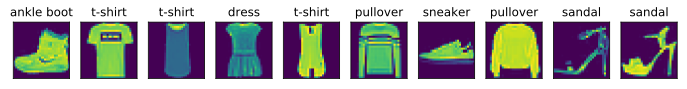

In [62]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0]) # 将第i个feature加到X中
    y.append(mnist_train[i][1]) # 将第i个label加到y中
show_fashion_mnist(X, get_fashion_mnist_labels(y))

#### 读取小批量

In [ ]:
batch_size = 256 #值越大时间越小
num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

start = time.time()
for X,y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

### softmax回归的从零开始实现

In [65]:
import torch
import torchvision
import numpy as np
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input")
import d2lzh as d2l

In [66]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, root='/Library/Frameworks/Python.framework/Versions/3.7/lib/kesci/input/FashionMNIST2065')

#### 初始化参数

In [67]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

In [68]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

#### 多维Tensor按维度操作

In [69]:
#对多维Tensor按维度操作
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))  # dim为0，按照相同的列求和，并在结果中保留列特征
print(X.sum(dim=1, keepdim=True))  # dim为1，按照相同的行求和，并在结果中保留行特征
print(X.sum(dim=0, keepdim=False)) # dim为0，按照相同的列求和，不在结果中保留列特征
print(X.sum(dim=1, keepdim=False)) # dim为1，按照相同的行求和，不在结果中保留行特征

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])
tensor([5, 7, 9])
tensor([ 6, 15])


#### 定义softmax

In [70]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdims=True)
    return X_exp / partition

In [71]:
X = torch.rand((2, 5))
X_prob = softmax(X)
print(X_prob, '\n', X_prob.sum(dim=1))

tensor([[0.1220, 0.2995, 0.1980, 0.1496, 0.2309],
        [0.2219, 0.1694, 0.3001, 0.1563, 0.1524]]) 
 tensor([1., 1.])


#### softmax定义模型
$O^{(i)}=x^{(i)}W+b \quad, \quad \hat{y}^{(i)}=softmax(O^{(i)})$

In [72]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)
#通过 view 函数将每张原始图像改成⻓长度为 num_inputs 的向量

#### 定义损失函数

In [73]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
y_hat.gather(1, y.view(-1, 1)) #得到标签的预测概率

tensor([[0.1000],
        [0.5000]])

In [74]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))

#### 定义准确率

In [75]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [76]:
print(accuracy(y_hat, y))

0.5


In [77]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [78]:
print(evaluate_accuracy(test_iter, net))

AttributeError: 'NDArray' object has no attribute 'view'

#### 训练模型

In [79]:
num_epochs, lr = 5, 0.1

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            
            l.backward()
            if optimizer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                optimizer.step()    
            
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

AttributeError: 'NDArray' object has no attribute 'view'

#### 预测

In [ ]:
X, y = iter(test_iter).next()

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

### softmax回归的简介实现

In [2]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import d2lzh as d2l

#### 获取和读取数据

In [81]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

#### 定义和初始化模型、损失函数

In [82]:
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    def forward(self, x):
        y = self.linear(x.view(x.shape[0],-1))
        return y
Net = LinearNet(num_inputs, num_outputs)

In [85]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0],-1)

In [86]:
from collections import OrderedDict
net = nn.Sequential(
    OrderedDict([
        ('flatten', FlattenLayer()),
        ('linear', nn.Linear(num_inputs, num_outputs))
    ])
)

In [87]:
init.normal_(net.linear.weight, mean=0, std=0.01)
init.normal_(net.linear.weight, mean=0, std=0.01)

Parameter containing:
tensor([[ 3.9520e-03, -8.8903e-03, -4.1730e-03,  ..., -1.7210e-02,
          2.2606e-03,  1.1892e-02],
        [ 1.0265e-02, -8.5957e-03, -1.1739e-03,  ..., -1.5741e-02,
          1.6289e-02, -4.0160e-04],
        [-1.2961e-02,  4.4111e-03,  4.1185e-03,  ...,  3.4390e-05,
         -1.1945e-02,  8.0097e-03],
        ...,
        [-3.8420e-03, -1.6602e-03, -1.6007e-02,  ..., -1.0193e-04,
          7.6818e-03,  9.7741e-04],
        [ 1.1876e-02,  2.3954e-02, -2.1284e-02,  ..., -9.1081e-03,
          2.8312e-03, -4.9187e-03],
        [ 4.4831e-03, -4.0959e-03, -4.2513e-03,  ..., -7.7112e-04,
          3.0814e-03,  1.4441e-02]], requires_grad=True)

#### softmax和交叉熵损失函数

In [88]:
loss = nn.CrossEntropyLoss()

#### 定义优化函数

In [89]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

#### 训练模型

In [91]:
num_epochs = 5
# d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

### 课后作业

## 多层感知机 Multi-Layer Perceptron

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数$\phi$进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。
$H=\phi(XW_h+b_h), O=HW_o+b_o$

### 隐藏层 hidden layer

###### 概念
位于输入层和输出层之间，包含了h个隐藏单元 (hidden unit)：$H = XW_h + b_h ， O = HW_o + b_o$

批量大小 $n$，输入个数 $d$。小批量样本 $X \in \mathbb{R}^{n \times d}$，隐藏层的输出 H $ \in \mathbb{R}^{n \times h}$，输出层的输出 $ O \in \mathbb{R}^{n \times q} $，其中：

隐藏层的权重参数 $ W_h \in \mathbb{R}^{d \times h}$ 和偏差参数 $ b_h \in \mathbb{R}^{1 \times h}$

输出层的权重参数 $ W_o \in \mathbb{R}^{h \times q}$ 和偏差参数 $ b_o \in \mathbb{R}^{1 \times q}$

### 激活函数 activation function

###### ReLU函数：Rectified Linear Unit
$ReLU(x) = max(x, 0) $【 非线性变换，只保证正数元素，并将负数元素清零 】

In [92]:
import d2lzh as d2l
import torch
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

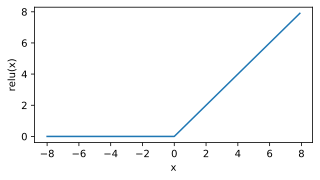

In [94]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu') #绘制ReLU函数

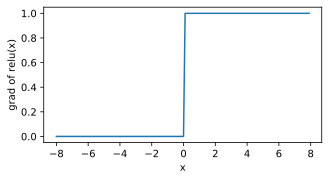

In [95]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu') #ReLU函数的导数

###### sigmoid函数
$sigmoid(x)=\frac{1}{1 + exp(-x)}$ 【 可以将元素的值变换到0和1之间 】

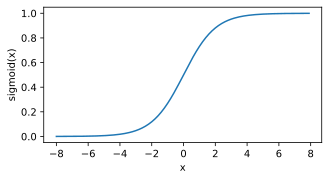

In [96]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid') #函数图，当输入接近0时，sigmoid函数接近线性变换

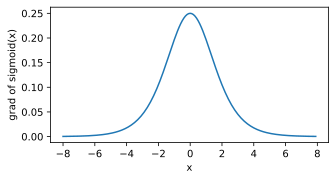

In [97]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid') #函数导数图，输入越偏离0时，sigmoid函数的导数越接近0

###### tanh函数
$tanh(x)=\frac{1 - exp(-2x)}{1 + exp(-2x)}$【 双曲正切，将元素的值变换到-1和1之间】

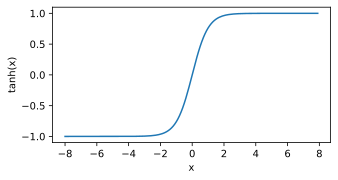

In [99]:
y = x.tanh()
xyplot(x, y, 'tanh') #函数图，原点对称，当输入接近0时，tanh函数接近线性变换

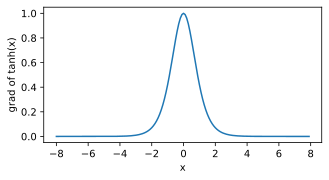

In [100]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh') #导数图，当输入为0时，tanh函数的导数达到最大值1

###### 关于激活函数的选择
ReLU 通用，但只能在隐藏层中使用。用于分类器时，sigmoid函数及其组合通常效果更好。由于梯度消失问题，有时要避免使用sigmoid和tanh函数。在神经网络层数较多的时候，最好使用ReLu函数，ReLu函数比较简单计算量少，而sigmoid和tanh函数计算量大很多。在选择激活函数的时候可以先选用ReLu函数如果效果不理想可以尝试其他激活函数。

### 多层感知机的从零开始实现

In [101]:
import torch
import numpy as np
import d2lzh as d2l

#### 获取和读取数据

In [102]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

#### 定义模型参数

In [103]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

#### 定义激活函数

In [104]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

#### 定义网络和损失函数

In [105]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

loss = torch.nn.CrossEntropyLoss()

#### 训练模型

In [106]:
num_epochs, lr = 5, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

AttributeError: 'NDArray' object has no attribute 'view'

### 多层感知机的简洁实现

In [ ]:
import d2lzh as d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

#### 定义模型

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'), nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

#### 读取数据并训练模型

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              batch_size, None, None, trainer)